### 손글씨 ( 숫자 ) 분류 경진대회

Metric : Accuracy

Data Type : png

In [6]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = './train/train_data.csv'

df = pd.read_csv(path)
df

filen_name  label
0     train0001.png      8
1     train0002.png      8
2     train0003.png      8
3     train0004.png      8
4     train0005.png      8
...             ...    ...
4995  train4996.png      6
4996  train4997.png      6
4997  train4998.png      6
4998  train4999.png      6
4999  train5000.png      6

[5000 rows x 2 columns]

file_name : 이미지의 파일명

label : 해당 이미지의 숫자

In [8]:
df_shuffled=df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

train_file_name = df_shuffled['filen_name']
train_label = df_shuffled['label']

# image 파일을 불러온뒤 변수에 저장
train_image = []
for file in train_file_name:
    train_image.append(Image.open('./train/' + file))

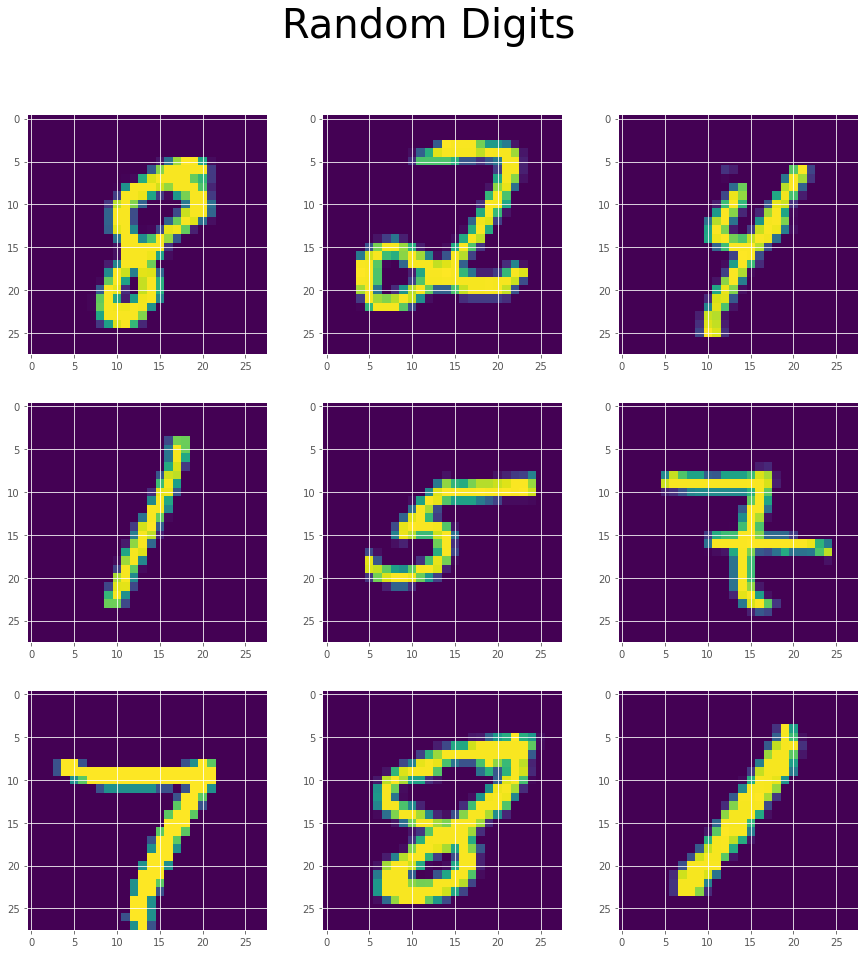

In [9]:
img = train_image[:9]

plt.style.use('ggplot')
fig, ax = plt.subplots(3,3, figsize=(15,15))
fig.suptitle('Random Digits', fontsize=40)
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(img[i-1])
plt.show()

In [10]:
train_file_name = df['filen_name']
train_label = df['label']

# image 파일을 불러온뒤 변수에 저장
train_image = []
for file in train_file_name:
    train_image.append(Image.open('./train/' + file))

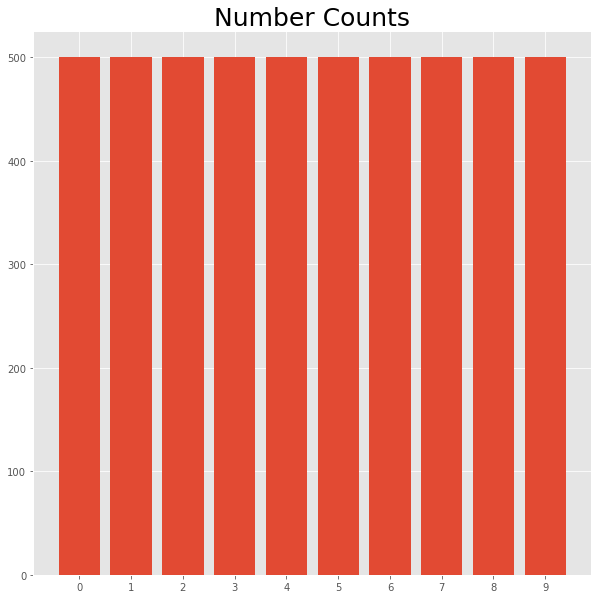

숫자 0의 개수는 500개
숫자 1의 개수는 500개
숫자 2의 개수는 500개
숫자 3의 개수는 500개
숫자 4의 개수는 500개
숫자 5의 개수는 500개
숫자 6의 개수는 500개
숫자 7의 개수는 500개
숫자 8의 개수는 500개
숫자 9의 개수는 500개


In [11]:
from collections import Counter

label_counter = Counter(train_label)

plt.figure(figsize=(10,10))
plt.title("Number Counts", fontsize= 25)
plt.bar(x=list(label_counter.keys()), height = list(label_counter.values()))
plt.xticks(list(range(10)))
plt.show()

for i in range(10):
    print(f"숫자 {i}의 개수는 {label_counter[i]}개")

0~9까지 10종류별로 500개씩 존재함

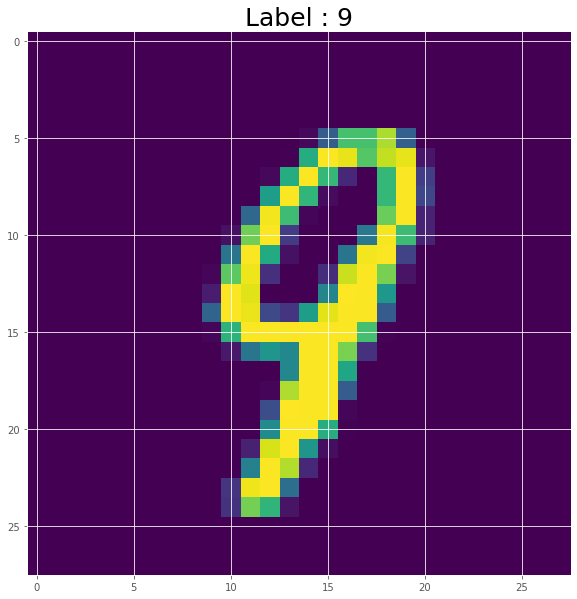

In [12]:
image, label = train_image[65],train_label[65]

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title("Label : " +str(label),fontsize=25)
plt.show()

In [13]:
# 이미지의 요약 통계 확인
image = np.array(image)

print('image size : ', image.shape)
print('image min, max : ', image.min(), image.max())
print('image 유의미한 pixel : ',(image > 0).sum())

image size :  (28, 28)
image min, max :  0 255
image 유의미한 pixel :  132


이미지는 가로로 28 pixel, 세로로 28 pixel인 이미지

각 픽셀의 값은 0~254의 값 (255)

위 이미지의 경우 132개의 픽셀로 숫자 8을 표현함


In [14]:
image_to_number = np.array([np.array(image).flatten() for image in train_image])

print('image min,max : ',image_to_number.min(), image_to_number.max())
print('image 유의미한 pixel : ', (image_to_number > 0).sum()/len(image_to_number))

image min,max :  0 255
image 유의미한 pixel :  151.1304


전체 이미지를 살펴보니 최대값이 255  
평균적으로 151개 픽셀을 사용해서 숫자를 표현



In [15]:
image_dict = {}

for i in range(10):
    idx = train_label[train_label == i].index
    image_dict[i] = image_to_number[idx]

'평균적인' 사람들의 손글씨 방법

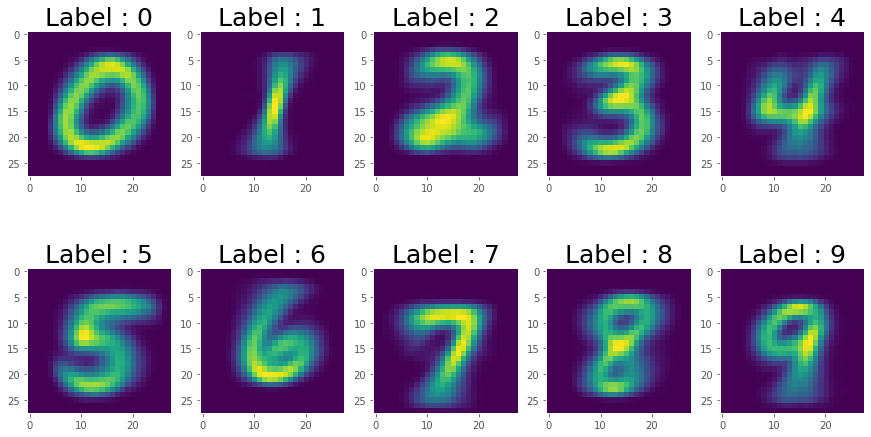

In [16]:
plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5,i + 1)
    plt.grid(False)
    plt.title('Label : ' + str(i), fontsize= 25)
    plt.imshow(image_dict[i].sum(axis=0).reshape((28,28)))
plt.show()

각 숫자들의 특성이 있는지 알아보자  
차원 축소 방법인 PCA, T-SNE을 사용하여 확인해보자

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_result = pca.fit_transform(image_to_number)

print( 'Explained variation poer principle component : {}'.format(pca.explained_variance_ratio_))

Explained variation poer principle component : [0.09530564 0.07167561 0.06028677]


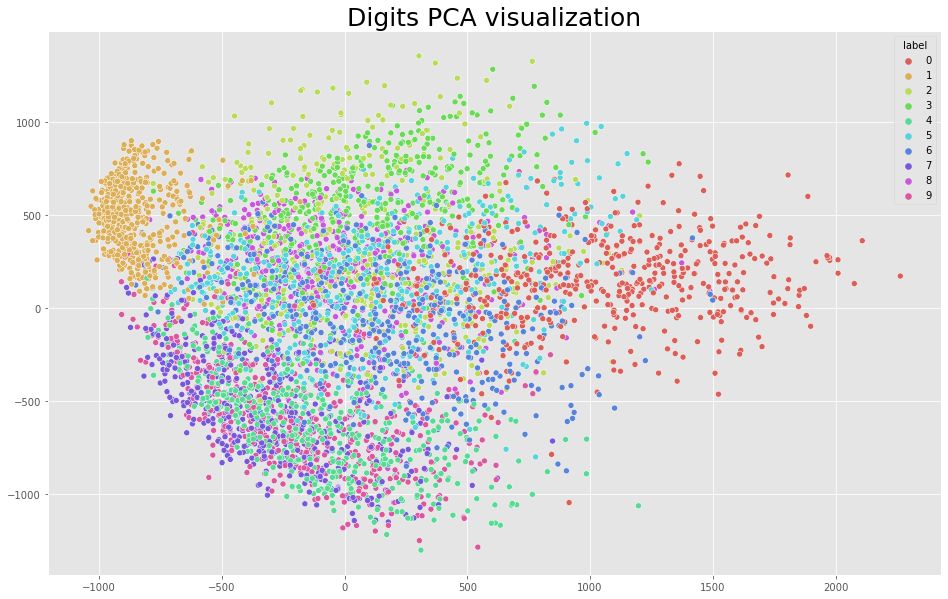

In [18]:
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title("Digits PCA visualization",fontsize=25)
sns.scatterplot(
    x=pca_result[:,0],y=pca_result[:,1],
    hue=train_label,
    palette = sns.color_palette('hls',10),
    legend='full'
)
plt.show()

숫자 0과 1은 어느정도 PCA 성분의 차이가 보이지만 그밖의 숫자는 섞여있기에  

다른 차이는 보이지 않는다.

PCA는 선형방식으로 정사영하여 차원을 축소하기때문에 군집화된 데이터들이 무너지는 단점이 존재  

해당 단점을 해결하기 위해 T-SNE 알고리즘 사용

고차원 벡터의 유사성이 저차원에서도 유사하도록 보존하는 알고리즘


In [19]:
from sklearn.manifold import TSNE

image_tsne = TSNE(n_components=3).fit_transform(image_to_number)

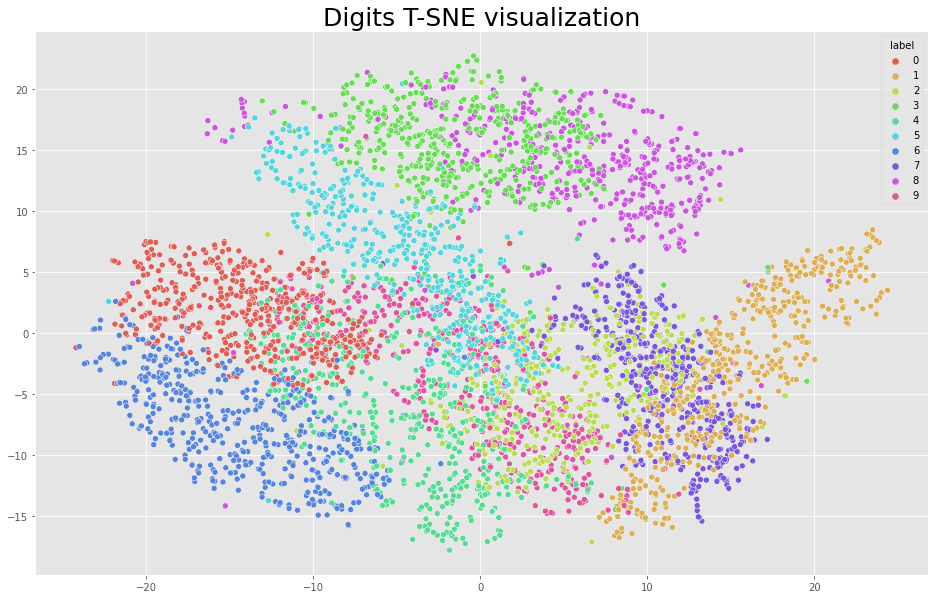

In [20]:
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title("Digits T-SNE visualization", fontsize=25)
sns.scatterplot(
    x=image_tsne[:,0], y=image_tsne[:,1],
    hue=train_label,
    palette=sns.color_palette("hls", 10),
    legend="full"
)
plt.show()

T_SNE은 데이터개수가 n개라면 연산량은 n의 제곱만큼 늘어나므로 시간이 오래걸리며

매번 돌릴때마다 다른 시각화 결과가 도출됨.

그리고 오직 2,3차원으로만 줄일수 있다는 점 등이 단점

모델을 구현하기에는 적합한 차원축소가 아님. 

이후 등장한 UMAP을 사용해보자

In [27]:
import umap

reducer = umap.UMAP(random_state=42,n_neighbors=20)
reducer.fit(image_to_number)

UMAP(n_neighbors=20, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [28]:
embedding = reducer.transform(image_to_number)

assert(np.all(embedding == reducer.embedding_))
embedding.shape

(5000, 2)

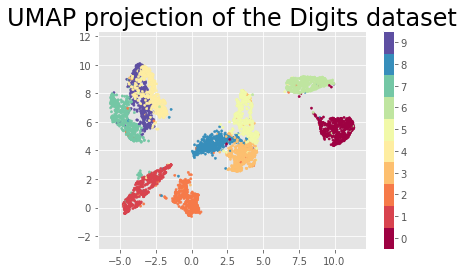

In [29]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=train_label, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [32]:
 embedding[:, 1]

array([4.753559 , 4.40301  , 3.9951453, ..., 8.643198 , 8.745732 ,
       8.333692 ], dtype=float32)

클래스들이 PCA, T-SNE보다 훨씬더 성공적으로 군집화되었다.

{9,4,7}, {8,3,5}, {6},{0},{1},{2}

하지만 좀더 확실히 보기 위해 해당 군집들이 해당 라벨들인지 확인해보자

In [47]:
from io import BytesIO
from PIL import Image
import base64

In [49]:
#hovertool에 이미지를 표현하기 위해 이미지 파일을 적절한 형식으로 변환
def embeddable_image(data):
    img_data = 255 - 15 *data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64,64),Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [35]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [53]:
from sklearn.datasets import load_digits

digits = load_digits()
image_28 = image_to_number.reshape(5000,28,28)

array([0, 1, 2, ..., 8, 9, 8])

In [74]:
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in df.label]
digits_df['image'] = list(map(embeddable_image, image_28))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)
plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

UMAP을 사용하여 적절하게 차원축소, 군집화 되어있는것을 확인할 수 있다

축소된 차원으로 모델을 만들경우 유의미한 결과를 도출할수 있을것 같다 
